/var/folders/ng/pdg5ntrj10j6gcpfmdh41qq00000gn/T/ipykernel_52775/1274876995.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  co2GrowthRate = pd.read_csv("co2_gr_mlo.csv", skiprows = range(100), skipfooter = 1,


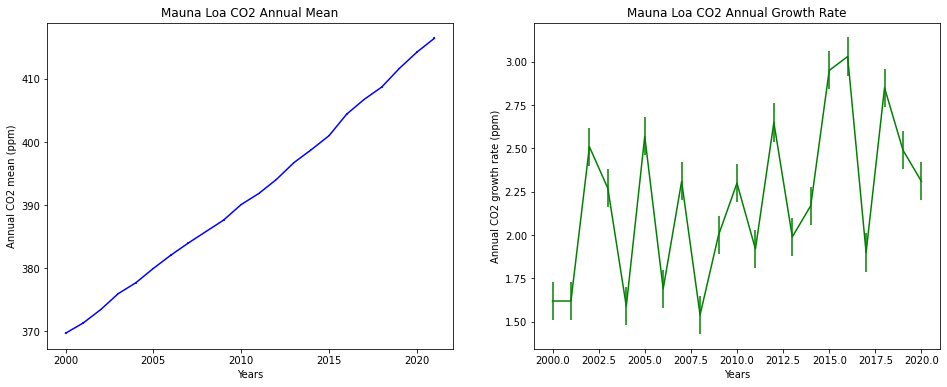

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

co2Mean = pd.read_csv("co2_annmean_mlo.csv", skiprows = range(97), 
                        names = ["Year", "Mean", "Uncertainty"])
df_co2 = pd.DataFrame(co2Mean)
df_co2 = df_co2.set_index("Year")
fig, axes = plt.subplots(figsize = (16,6), ncols=2) # To show two figures side by side

df_co2.Mean.plot(ax = axes[0], color = 'blue', yerr = df_co2.Uncertainty, xlabel = 'Years', ylabel ='Annual CO2 mean (ppm)',
                title = 'Mauna Loa CO2 Annual Mean')

co2GrowthRate = pd.read_csv("co2_gr_mlo.csv", skiprows = range(100), skipfooter = 1,
                            names = ["Year", "Growth_rate", "Uncertainty"])
df_gr = pd.DataFrame(co2GrowthRate)
# print(df_gr)
df_gr = df_gr.set_index("Year")
df_gr.Growth_rate.plot(ax= axes[1], color = 'green', yerr = df_gr.Uncertainty, xlabel = 'Years', ylabel ='Annual CO2 growth rate (ppm)',
                title = 'Mauna Loa CO2 Annual Growth Rate')
# plt.tight_layout()
plt.show()


In [ ]:
at the end of the last ice age atmospheric CO2 concentrations increased by around 50% while global temperatures increased by around 4C. 
If CO2 were the only factor at work, this would imply a very high sensitivity of the climate to CO2 – 
around 8C per doubling CO2, far higher than current estimates based on climate models and other lines of evidence. 

In [ ]:
# Assuming that the co2 in the 2020-2040 period will rise exactly the same way